<a href="https://colab.research.google.com/github/belom-nlp/HSE_Lomakin_car_prices/blob/main/EDA_cars_template_Lomakin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подержанные автомобили

Датасет содержит информацию о характеристиках и ценах подержанных автомобилей в некоторой стране

## Импорт библиотек, константы

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
RANDOM_STATE = 42

In [ ]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/cars.csv"

## Загрузка и обзор данных

### Загрузка

In [ ]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `selling_price`: цена продажи, числовая

**Признаки**
- `name` (string): модель автомобиля
- `year` (numeric, int): год выпуска с завода-изготовителя
- `km_driven` (numeric, int): пробег на дату продажи
- `fuel` (categorical: _Diesel_ или _Petrol_, или _CNG_, или _LPG_, или _electric_): тип топлива
- `seller_type` (categorical: _Individual_ или _Dealer_, или _Trustmark Dealer_): продавец
- `transmission` (categorical: _Manual_ или _Automatic_): тип трансмиссии
- `owner` (categorical: _First Owner_ или _Second Owner_, или _Third Owner_, или _Fourth & Above Owner_): какой по счёту хозяин?
- `mileage` (string, по смыслу числовой): пробег, требует предобработки
- `engine` (string, по смыслу числовой): рабочий объем двигателя, требует предобработки
- `max_power` (string, по смыслу числовой): пиковая мощность двигателя, требует предобработки
- `torque` (string, по смыслу числовой, а то и 2): крутящий момент, требует предобработки
- `seats` (numeric, float; по смыслу categorical, int)

In [ ]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Как видим, в колонках с 8 по 12 у нас есть пропуски в данных (максимум около 200). Посмотрим, совпадают они или нет.

In [ ]:
df[df.mileage.isnull()].index == df[df.engine.isnull()].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
df[df.mileage.isnull()].index == df[df.seats.isnull()].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Прекраснейшим образом совпадают. Попробуем убрать.

In [ ]:
df_1 = df.dropna(subset=['mileage'])

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 0 to 6998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6797 non-null   object 
 1   year             6797 non-null   int64  
 2   selling_price    6797 non-null   int64  
 3   km_driven        6797 non-null   int64  
 4   fuel             6797 non-null   object 
 5   seller_type      6797 non-null   object 
 6   transmission     6797 non-null   object 
 7   owner            6797 non-null   object 
 8   mileage          6797 non-null   object 
 9   engine           6797 non-null   object 
 10  max_power        6797 non-null   object 
 11  torque           6796 non-null   object 
 12  seats            6797 non-null   float64
 13  age              6797 non-null   int64  
 14  mileage_count    6797 non-null   float64
 15  mileage_measure  6797 non-null   object 
 16  engine_volume    6797 non-null   float64
 17  max_power_coun

Идеально!

In [ ]:
# случайные три записи из датасета
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6101,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2017,880000,33000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1498 CC,98.96 bhp,205Nm@ 1750-3250rpm,5.0
4928,Mahindra Bolero 2011-2019 SLX 2WD BSIII,2013,500000,160000,Diesel,Individual,Manual,First Owner,15.96 kmpl,2523 CC,62.1 bhp,195Nm@ 1400-2200rpm,7.0
1609,Honda Amaze V CVT Petrol BSIV,2019,779000,7032,Petrol,Trustmark Dealer,Automatic,First Owner,19.0 kmpl,1199 CC,88.76 bhp,110Nm@ 4800rpm,5.0


# Предобработка данных

Выясним, нужна ли нам переменная name.

In [ ]:
df.name.nunique()

1924

Видим, что у нас 1924 различных класса. Класс вполне может влиять на стоимость машины, избавиться от этой переменной мы не сможем.

## Year

Посмотрим на то, какие годы представлены в колонке year, максимальное и минимальное значение.

In [ ]:
print('Число уникальных элементов в столбце:', df.year.nunique())
print('Годы представлены в диапазоне от', df.year.unique().min(), 'до', df.year.unique().max())

Число уникальных элементов в столбце: 29
Годы представлены в диапазоне от 1983 до 2020


Представляется более логичным и удобным определить на основании года возраст машины.

In [ ]:
df['age'] = 2021 - df['year']

Интересно посмотреть на распределение по годам.

<Axes: xlabel='age', ylabel='Count'>

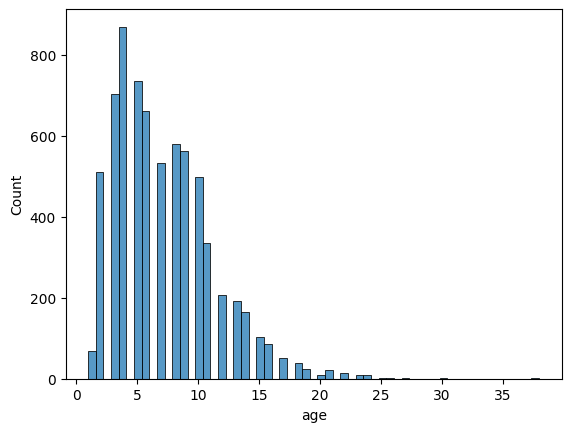

In [ ]:
sns.histplot(df.age)

Как видим, данные распределены неравномерно, подавляющее большинство машин не старше 13 лет. Попробуем сбалансировать данные.

In [ ]:
print('Количество машин старше 13 лет:', df[df.age > 13].shape[0])

Количество машин старше 13 лет: 537


Заменим все возрасты больше 13 цифрой 14.

In [ ]:
df['age'] = np.where(df['age'] > 13, 14, df['age'])
df.age.nunique()

14

<Axes: xlabel='age', ylabel='Count'>

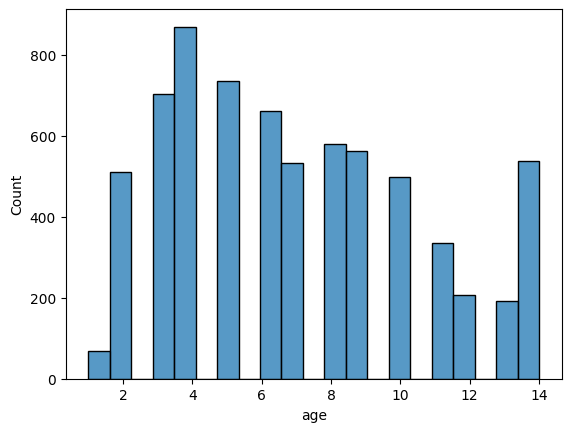

In [ ]:
sns.histplot(df.age)

С таким распределением нашей модели будет гораздо легче справиться.

##Mileage

Посмотрим на переменную milage.

In [ ]:
df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '23.0 kmpl', '16.1 kmpl', '20.14 kmpl',
       '17.3 km/kg', '23.59 kmpl', '20.0 kmpl', '19.01 kmpl', '17.3 kmpl',
       '19.3 kmpl', nan, '18.9 kmpl', '18.15 kmpl', '19.7 kmpl',
       '22.54 kmpl', '21.0 kmpl', '25.5 kmpl', '26.59 kmpl', '21.5 kmpl',
       '21.4 kmpl', '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl',
       '14.0 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '27.3 kmpl',
       '11.36 kmpl', '17.68 kmpl', '18.53 kmpl', '14.84 kmpl',
       '21.12 kmpl', '20.36 kmpl', '21.27 kmpl', '18.16 kmpl',
       '22.0 kmpl', '25.1 kmpl', '20.51 kmpl', '21.66 kmpl', '25.2 kmpl',
       '22.9 kmpl', '16.02 kmpl', '20.54 kmpl', '22.77 kmpl',
       '15.71 kmpl', '23.1 kmpl', '19.02 kmpl', '19.81 kmpl',
       '26.2 km/kg', '16.47 kmpl', '15.04 kmpl', '18.5 kmpl', '19.1 kmpl',
       '21.79 kmpl', '18.8 kmpl

Как видим, числа находятся в разных диапазонах: км/л или км/кг. Хотелось бы это унифицировать, однако проблема в том, что у разного топлива разная плотность. Поэтому пока разобьем на две колонки: значение и единица

In [ ]:
df['mileage_count'] = df['mileage'].apply(lambda x: float(x.split(' ')[0]) if type(x) == str else None)

In [ ]:
df['mileage_measure'] = df['mileage'].apply(lambda x: x.split(' ')[1] if type(x) == str else None)

Убедимся, что данные не потеряны.

In [ ]:
df.mileage.isna().sum() == df.mileage_count.isna().sum()

True

Посмотрим, в каких случаях у нас меняется единица измерения. По логике вещей, это должно быть связано с типом топлива.

In [ ]:
df[df['mileage_measure'] == 'km/kg'].fuel.unique()

array(['LPG', 'CNG'], dtype=object)

In [ ]:
df[df['mileage_measure'] == 'kmpl'].fuel.unique()

array(['Diesel', 'Petrol'], dtype=object)

Видимо, в случае с электрическим топливом mileage == None. Для модели данные лучше всего подавать в следующем виде: mileage_measure через one-hot encoding. Fuel можно вообще не подавать: информация о нем и так содержится в этой колонке.

##Engine

Посмотрим на данные.

In [ ]:
df.engine.unique()

array(['1248 CC', '1498 CC', '1396 CC', '1298 CC', '1197 CC', '1061 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', nan,
       '1198 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC', '1497 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '2755 CC', '1968 CC',
       '1196 CC', '1373 CC', '1598 CC', '1998 CC', '1086 CC', '1194 CC',
       '1798 CC', '1405 CC', '1582 CC', '999 CC', '2487 CC', '1999 CC',
       '2987 CC', '1995 CC', '1451 CC', '1969 CC', '2967 CC', '2497 CC',
       '1797 CC', '1991 CC', '2362 CC', '1493 CC', '1341 CC', '1199 CC',
       '1794 CC', '1193 CC', '2696 CC', '799 CC', '1495 CC', '1186 CC',
       '1047 CC', '2498 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC',
       '1984 CC', '2354 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '814 CC', '1997 CC', '1948 CC', '2997 CC', '1172 CC', '2489 CC',
       '2499 CC', '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC',
       '1462 CC', '2956 CC', '1527 CC', '2199 CC', '995 CC', '1599

Единица измерения одна, поэтому обработать колонку гораздо проще.

In [ ]:
df['engine_volume'] = df['engine'].apply(lambda x: float(x.split(' ')[0]) if type(x) == str else None)

##Max_power

Так же поступим с max_power.

In [ ]:
df.max_power.unique()

array(['74 bhp', '103.52 bhp', '90 bhp', '88.2 bhp', '81.86 bhp',
       '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp', '46.3 bhp',
       '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp', '83.1 bhp',
       '47.3 bhp', '73.8 bhp', '34.2 bhp', '88.5 bhp', '35 bhp',
       '40.3 bhp', '121.3 bhp', '138.03 bhp', '160.77 bhp', '117.3 bhp',
       '116.3 bhp', '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp',
       '98.63 bhp', '175.56 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '120 bhp', '94.68 bhp', '160 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.14 bhp', '83.8 bhp',
       '126.2 bhp', '62.1 bhp', '86.7 bhp', '188 bhp', '214.56 bhp',
       '177 bhp', '148.31 bhp', 

In [ ]:
df['max_power_count'] = df['max_power'].apply(lambda x: float(x.strip().split(' ')[0]) if type(x) == str and x!=' bhp' else None)

Проверим количество Nan-ов

In [ ]:
print(df.max_power.isna().sum(), df.max_power_count.isna().sum())

196 197


Как видим, потеряли всего одно значение, которое в таблице выглядело как ' bhp' (без числа), то есть ничего не потеряли.

## Torque

Здесь данные отформатированы черт знает как, придется много переделывать.

In [ ]:
df['torque'] = df['torque'].apply(lambda x: x.replace('at', '@') if type(x) == str else None)
df['torque'] = df['torque'].apply(lambda x: x.replace('/', '@') if type(x) == str else None)

In [ ]:
df['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '22.4 kgm @ 1750-2750rpm',
       '11.5@ 4,500(kgm@ rpm)', '113.75nm@ 4000rpm',
       '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm', '170Nm@ 1800-2400rpm',
       '160Nm@ 2000rpm', '248Nm@ 2250rpm', '78Nm@ 4500rpm', None,
       '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm', '62Nm@ 3000rpm',
       '219.7Nm@ 1500-2750rpm', '200Nm@ 1750rpm', '115Nm@ 4000rpm',
       '69Nm@ 3500rpm', '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rpm', '111.7Nm@ 4000rpm', '219.6Nm@ 1500-2750rpm',
       '112Nm@ 4000rpm', '250Nm@ 1500-3000rpm', '130Nm@ 4

In [ ]:
df_1.torque.unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '22.4 kgm @ 1750-2750rpm',
       '11.5@ 4,500(kgm@ rpm)', '113.75nm@ 4000rpm',
       '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm', '170Nm@ 1800-2400rpm',
       '160Nm@ 2000rpm', '248Nm@ 2250rpm', '78Nm@ 4500rpm',
       '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm', '62Nm@ 3000rpm',
       '219.7Nm@ 1500-2750rpm', '200Nm@ 1750rpm', '115Nm@ 4000rpm',
       '69Nm@ 3500rpm', '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rpm', '111.7Nm@ 4000rpm', '219.6Nm@ 1500-2750rpm',
       '112Nm@ 4000rpm', '250Nm@ 1500-3000rpm', '130Nm@ 4000rpm

Итак, первая часть представляет собой значение крутящего момента в ньютон-метрах. Отделим ее от второй.

In [ ]:
df_1['torque_1'] = df_1.torque.apply(lambda x: x.split('@', maxsplit=1)[0].lower() if type(x) == str else None)

<ipython-input-53-d5b9529e5222>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['torque_1'] = df_1.torque.apply(lambda x: x.split('@', maxsplit=1)[0].lower() if type(x) == str else None)


In [ ]:
def count_nm(x: str):
  if 'nm' in x:
    x = x.replace('nm', '')
    x = x.strip()
    if '(' in x:
      if '380' in x:
        return 380.0
    else:
      return float(x)
  elif 'kgm' in x:
    x = x.replace('kgm', '')
    x = x.strip()
    return float(x) * 9.8
  else:
    if float(x) > 100:
      return float(x)
    else:
      return float(x) * 9.8

In [ ]:
df_1['torque_1'] = df_1['torque_1'].apply(lambda x: count_nm(x) if type(x) == str else None )

In [ ]:
df_1['rpm'] = df_1['torque'].apply(lambda x: x.split('@', maxsplit=1)[1].lower() if type(x) == str and '@' in x else None)

In [ ]:
def process_rpm(x: str):
  x = x.replace('(kgm@ rpm)', '')
  x = x.replace('rpm', '')
  x = x.strip()
  x = x.replace(',', '')
  x = x.replace('+@', '')
  x = x.replace('(nm@ )', '')
  if '-' in x:
    rpm = x.split('-')
    rpm[0] = int(rpm[0])
    rpm[1] = int(rpm[1])
  elif '~' in x:
    rpm = x.split('~')
    rpm[0] = int(rpm[0])
    rpm[1] = int(rpm[1])
  else:
    rpm = [int(x), int(x)]
  return rpm

In [ ]:
df_1['rpm'] = df_1['rpm'].apply(lambda x: process_rpm(x) if type(x) == str else None)

In [ ]:
df_1.rpm.isna().sum()

29

Странно, но...

In [ ]:
df_1[df_1['rpm'].isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,mileage_count,mileage_measure,engine_volume,max_power_count,torque_1,rpm
129,Volvo XC40 D4 R-Design,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,3,18.0,kmpl,1969.0,190.0,400.0,None
361,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,18.0,kmpl,1969.0,190.0,400.0,None
567,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,18.0,kmpl,1969.0,190.0,400.0,None
929,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,18.0,kmpl,1969.0,190.0,400.0,None
947,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,18.0,kmpl,1969.0,190.0,400.0,None
962,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,18.0,kmpl,1969.0,190.0,400.0,None
978,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,18.0,kmpl,1969.0,190.0,400.0,None
1468,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,18.0,kmpl,1969.0,190.0,400.0,None
1568,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,18.0,kmpl,1969.0,190.0,400.0,None
2293,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,18.0,kmpl,1969.0,190.0,400.0,None


Всё в порядке!

In [ ]:
df_1['rpm_min'] = df_1['rpm'].apply(lambda x: x[0] if x is not None else None)
df_1['rpm_max'] = df_1['rpm'].apply(lambda x: x[1] if x is not None else None)

Для модели будем исключать из таблицы следующие колонки: name, year, fuel, mileage, engine, max_power, torque

In [ ]:
df_1 = df_1.drop(columns=['name', 'year', 'fuel', 'mileage', 'engine', 'max_power', 'torque', 'rpm'])

In [ ]:
df_1

,selling_price,km_driven,seller_type,transmission,owner,seats,age,mileage_count,mileage_measure,engine_volume,max_power_count,torque_1,rpm_max,rpm_min
0,450000,145500,Individual,Manual,First Owner,5.0,7,23.40,kmpl,1248.0,74.00,190.00,2000,2000
1,370000,120000,Individual,Manual,Second Owner,5.0,7,21.14,kmpl,1498.0,103.52,250.00,2500,1500
2,225000,127000,Individual,Manual,First Owner,5.0,11,23.00,kmpl,1396.0,90.00,219.52,2750,1750
3,130000,120000,Individual,Manual,First Owner,5.0,14,16.10,kmpl,1298.0,88.20,112.70,4500,4500
4,440000,45000,Individual,Manual,First Owner,5.0,4,20.14,kmpl,1197.0,81.86,113.75,4000,4000


<Axes: >

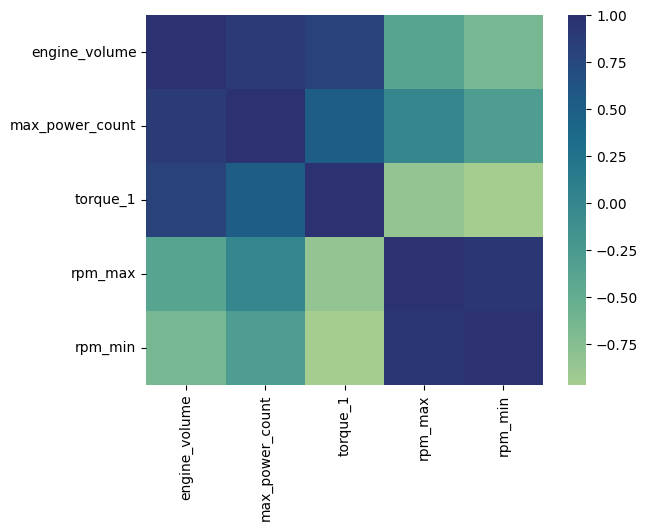

In [ ]:
corr = df_1[['engine_volume','max_power_count', 'torque_1', 'rpm_max', 'rpm_min']].corr()

sns.heatmap(corr, cmap="crest")

Видим, что max_power_count и engine_volume тесно коррелируют между собой (что и логично). Пока убирать не будем, можно будет поэкспериментировать с этим и посмотреть, как будут себя вести различные модели.